# 一、导入数据

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras

In [2]:
data = pd.read_excel("input/data_.xlsx",index_col=0)

In [3]:
data_ = data.copy()
data_

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big,Thickness_class,Cell Size
ID,,,,,,,,,,,,,,,,
1275807,4,2,4,3,2,2,2,1,1,2,2,1,0,0,medium,small
1193683,1,1,2,1,3,1,1,1,1,2,1,1,0,0,thin,small
1170419,10,10,10,8,2,10,4,1,1,4,3,0,0,1,thick,big
1190386,4,6,6,5,7,6,7,7,3,4,2,0,1,0,medium,medium
1202125,4,1,1,1,2,1,3,1,1,2,2,1,0,0,medium,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493452,1,1,3,1,2,1,1,1,1,2,1,1,0,0,thin,small
1116132,6,3,4,1,5,2,3,9,1,4,2,1,0,0,medium,small
1133136,3,1,1,1,2,3,3,1,1,2,1,1,0,0,thin,small


In [4]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1275807 to 1206314
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              645 non-null    int64 
 1   Uniformity of Cell Size      645 non-null    int64 
 2   Uniformity of Cell Shape     645 non-null    int64 
 3   Marginal Adhesion            645 non-null    int64 
 4   Single Epithelial Cell Size  645 non-null    int64 
 5   Bare Nuclei                  645 non-null    int64 
 6   Bland Chromatin              645 non-null    int64 
 7   Normal Nucleoli              645 non-null    int64 
 8   Mitoses                      645 non-null    int64 
 9   Class                        645 non-null    int64 
 10  Thickness_classnum           645 non-null    int64 
 11  Cell Size _small             645 non-null    int64 
 12  Cell Size _medium            645 non-null    int64 
 13  Cell Size _big           

# 二、设置变量

In [5]:
features = data_.drop(columns=['Class','Thickness_class','Cell Size'])
features

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big
ID,,,,,,,,,,,,,
1275807,4,2,4,3,2,2,2,1,1,2,1,0,0
1193683,1,1,2,1,3,1,1,1,1,1,1,0,0
1170419,10,10,10,8,2,10,4,1,1,3,0,0,1
1190386,4,6,6,5,7,6,7,7,3,2,0,1,0
1202125,4,1,1,1,2,1,3,1,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493452,1,1,3,1,2,1,1,1,1,1,1,0,0
1116132,6,3,4,1,5,2,3,9,1,2,1,0,0
1133136,3,1,1,1,2,3,3,1,1,1,1,0,0


In [6]:
target = data_.Class.replace(to_replace = [2, 4], value = [0,1])
target

ID
1275807    0
1193683    0
1170419    1
1190386    1
1202125    0
          ..
493452     0
1116132    1
1133136    0
1158247    0
1206314    0
Name: Class, Length: 645, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
transfer = StandardScaler()

In [9]:
features_ = transfer.fit_transform(features)

In [10]:
features_

array([[-0.17231198, -0.39676889,  0.23516391, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.72153531, -0.43303311, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [ 1.93130744,  2.20136243,  2.23975499, ..., -1.60727513,
        -0.47319015,  3.06646797],
       ...,
       [-0.52291521, -0.72153531, -0.76713162, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.72153531, -0.76713162, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.39676889, -0.0989346 , ...,  0.62217102,
        -0.47319015, -0.32610809]])

# 三、拆分数据集

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_features_full, test_features, train_target_full, test_target = train_test_split(
    features, target, 
    test_size = 145, random_state = 99)

In [13]:
print(train_features_full.shape)
print(train_target_full.shape)
print(test_features.shape)
print(test_target.shape)

(500, 13)
(500,)
(145, 13)
(145,)


In [14]:
train_features, validation_features, train_target, validation_target = train_test_split(
    train_features_full, train_target_full, 
    test_size = 100, random_state = 99)

In [15]:
print(train_features.shape)
print(train_target.shape)
print(validation_features.shape)
print(validation_target.shape)
print(test_features.shape)
print(test_target.shape)

(400, 13)
(400,)
(100, 13)
(100,)
(145, 13)
(145,)


# 四、建立模型 

## 1. Wide 模型

In [16]:
input_  = keras.layers.Input(shape = train_features.shape[1:])
hidden1 = keras.layers.Dense(10,activation='selu')(input_)
hidden2 = keras.layers.Dense(5,activation='selu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1,activation='sigmoid')(concat)
model_wide = keras.Model(inputs=[input_], outputs=[output])

In [17]:
model_wide.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 10)           140         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 5)            55          dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 18)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

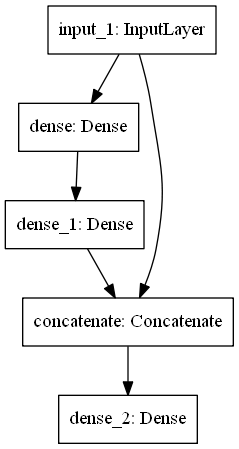

In [18]:
keras.utils.plot_model(model_wide, to_file='output/model_wide.png')

In [19]:
model_wide.compile(loss = 'binary_crossentropy', metrics = 'accuracy', optimizer='rmsprop')

In [20]:
model_wide.fit(train_features, train_target, batch_size = 20, epochs=200,
         validation_data=(validation_features, validation_target))

Epoch 1/200
20/20 [==============================] - 0s 8ms/step - loss: 4.1081 - accuracy: 0.6300 - val_loss: 3.6713 - val_accuracy: 0.5700
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 2.6307 - accuracy: 0.5900 - val_loss: 2.3109 - val_accuracy: 0.5100
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 1.7212 - accuracy: 0.5075 - val_loss: 1.4289 - val_accuracy: 0.5000
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 1.1206 - accuracy: 0.4925 - val_loss: 0.9583 - val_accuracy: 0.5100
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.8440 - accuracy: 0.5400 - val_loss: 0.7559 - val_accuracy: 0.6300
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.6675 - val_loss: 0.5954 - val_accuracy: 0.7400
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.8100 - val_loss: 0.4675 - val_accuracy: 0.8400
Epoch 8/200
2

Epoch 59/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0937 - accuracy: 0.9600 - val_loss: 0.1336 - val_accuracy: 0.9600
Epoch 60/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0923 - accuracy: 0.9650 - val_loss: 0.1315 - val_accuracy: 0.9600
Epoch 61/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0920 - accuracy: 0.9600 - val_loss: 0.1305 - val_accuracy: 0.9600
Epoch 62/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.9650 - val_loss: 0.1289 - val_accuracy: 0.9600
Epoch 63/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.9650 - val_loss: 0.1287 - val_accuracy: 0.9600
Epoch 64/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0878 - accuracy: 0.9625 - val_loss: 0.1294 - val_accuracy: 0.9700
Epoch 65/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0898 - accuracy: 0.9625 - val_loss: 0.1284 - val_accuracy: 0.9700
Epoch 

20/20 [==============================] - 0s 3ms/step - loss: 0.0693 - accuracy: 0.9750 - val_loss: 0.1213 - val_accuracy: 0.9800
Epoch 117/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0690 - accuracy: 0.9750 - val_loss: 0.1121 - val_accuracy: 0.9800
Epoch 118/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0720 - accuracy: 0.9750 - val_loss: 0.1091 - val_accuracy: 0.9500
Epoch 119/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9700 - val_loss: 0.1106 - val_accuracy: 0.9700
Epoch 120/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0697 - accuracy: 0.9750 - val_loss: 0.1077 - val_accuracy: 0.9500
Epoch 121/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0687 - accuracy: 0.9725 - val_loss: 0.1071 - val_accuracy: 0.9500
Epoch 122/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0709 - accuracy: 0.9700 - val_loss: 0.1066 - val_accuracy: 0.9500
Epoch 123/200

20/20 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9850 - val_loss: 0.1086 - val_accuracy: 0.9500
Epoch 174/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 0.9850 - val_loss: 0.1073 - val_accuracy: 0.9600
Epoch 175/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 0.9825 - val_loss: 0.1146 - val_accuracy: 0.9500
Epoch 176/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0593 - accuracy: 0.9800 - val_loss: 0.1080 - val_accuracy: 0.9600
Epoch 177/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9800 - val_loss: 0.1108 - val_accuracy: 0.9500
Epoch 178/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 0.9825 - val_loss: 0.1164 - val_accuracy: 0.9500
Epoch 179/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9800 - val_loss: 0.1092 - val_accuracy: 0.9600
Epoch 180/200

## 2. 多输入模型

In [21]:
train_features_A = train_features.iloc[:,:5]
train_features_B = train_features.iloc[:,5:]
validation_features_A = validation_features.iloc[:,:5]
validation_features_B = validation_features.iloc[:,5:]

In [22]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[8], name="deep_input")
hidden1_ = keras.layers.Dense(5, activation="selu")(input_B)
hidden2_ = keras.layers.Dense(3, activation="selu")(hidden1_)
concat_ = keras.layers.concatenate([input_A, hidden2_])
output_ = keras.layers.Dense(1,activation='sigmoid')(concat_)
model_combine = keras.Model(inputs=[input_A, input_B], outputs=[output_])

In [23]:
model_combine.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 5)            45          deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 3)            18          dense_3[0][0]                    
_______________________________________________________________________________________

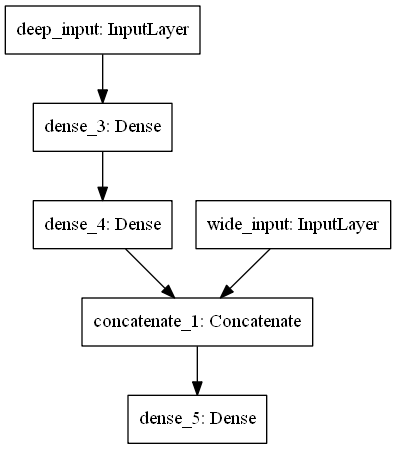

In [24]:
keras.utils.plot_model(model_combine,to_file='output/model_combine.png')

In [25]:
model_combine.compile(loss = 'binary_crossentropy', metrics = 'accuracy', optimizer='rmsprop')

In [26]:
model_combine.fit([train_features_A, train_features_B],train_target,batch_size = 20, epochs=200,
                 validation_data=((validation_features_A,validation_features_B), validation_target))

Epoch 1/200
20/20 [==============================] - 0s 8ms/step - loss: 0.6047 - accuracy: 0.7200 - val_loss: 0.5800 - val_accuracy: 0.7500
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.5216 - accuracy: 0.7625 - val_loss: 0.5176 - val_accuracy: 0.7900
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4722 - accuracy: 0.8300 - val_loss: 0.4793 - val_accuracy: 0.8100
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4404 - accuracy: 0.8550 - val_loss: 0.4531 - val_accuracy: 0.7800
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4181 - accuracy: 0.8725 - val_loss: 0.4344 - val_accuracy: 0.8200
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4011 - accuracy: 0.8775 - val_loss: 0.4191 - val_accuracy: 0.8400
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8850 - val_loss: 0.4053 - val_accuracy: 0.8400
Epoch 8/200
2

Epoch 59/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1341 - accuracy: 0.9550 - val_loss: 0.1362 - val_accuracy: 0.9600
Epoch 60/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1337 - accuracy: 0.9575 - val_loss: 0.1354 - val_accuracy: 0.9600
Epoch 61/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1325 - accuracy: 0.9550 - val_loss: 0.1346 - val_accuracy: 0.9600
Epoch 62/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1327 - accuracy: 0.9550 - val_loss: 0.1338 - val_accuracy: 0.9600
Epoch 63/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1319 - accuracy: 0.9550 - val_loss: 0.1327 - val_accuracy: 0.9600
Epoch 64/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1311 - accuracy: 0.9550 - val_loss: 0.1318 - val_accuracy: 0.9600
Epoch 65/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1305 - accuracy: 0.9500 - val_loss: 0.1310 - val_accuracy: 0.9600
Epoch 

20/20 [==============================] - 0s 2ms/step - loss: 0.1084 - accuracy: 0.9575 - val_loss: 0.0926 - val_accuracy: 0.9600
Epoch 117/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1081 - accuracy: 0.9625 - val_loss: 0.0918 - val_accuracy: 0.9600
Epoch 118/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1084 - accuracy: 0.9600 - val_loss: 0.0910 - val_accuracy: 0.9600
Epoch 119/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1068 - accuracy: 0.9575 - val_loss: 0.0903 - val_accuracy: 0.9600
Epoch 120/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9600 - val_loss: 0.0896 - val_accuracy: 0.9600
Epoch 121/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1066 - accuracy: 0.9575 - val_loss: 0.0888 - val_accuracy: 0.9600
Epoch 122/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.9600 - val_loss: 0.0881 - val_accuracy: 0.9600
Epoch 123/200

20/20 [==============================] - 0s 3ms/step - loss: 0.0910 - accuracy: 0.9650 - val_loss: 0.0703 - val_accuracy: 0.9600
Epoch 174/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0912 - accuracy: 0.9675 - val_loss: 0.0702 - val_accuracy: 0.9600
Epoch 175/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0917 - accuracy: 0.9625 - val_loss: 0.0700 - val_accuracy: 0.9700
Epoch 176/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0908 - accuracy: 0.9650 - val_loss: 0.0697 - val_accuracy: 0.9700
Epoch 177/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0908 - accuracy: 0.9625 - val_loss: 0.0695 - val_accuracy: 0.9700
Epoch 178/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0907 - accuracy: 0.9600 - val_loss: 0.0693 - val_accuracy: 0.9700
Epoch 179/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0904 - accuracy: 0.9625 - val_loss: 0.0691 - val_accuracy: 0.9700
Epoch 180/200

In [27]:
tensorboard_cb = keras.callbacks.TensorBoard(log_dir='output/logs',histogram_freq=1,embeddings_freq=1)

In [28]:
model_combine.fit((train_features_A, train_features_B),train_target,batch_size = 20, epochs=200,
                 validation_data=((validation_features_A,validation_features_B), validation_target),
                  callbacks=tensorboard_cb)

Epoch 1/200
 1/20 [>.............................] - ETA: 0s - loss: 0.0335 - accuracy: 1.0000WARNING:tensorflow:From D:\Users\lihaiyang\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
20/20 [==============================] - 0s 12ms/step - loss: 0.0867 - accuracy: 0.9675 - val_loss: 0.0654 - val_accuracy: 0.9800
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0865 - accuracy: 0.9725 - val_loss: 0.0653 - val_accuracy: 0.9800
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0863 - accuracy: 0.9650 - val_loss: 0.0651 - val_accuracy: 0.9800
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0864 - accuracy: 0.9650 - val_loss: 0.0650 - val_accuracy: 0.9800
Epoch 5/200
20/20 [==============================] - 0s 4ms/step - 

Epoch 52/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0802 - accuracy: 0.9700 - val_loss: 0.0631 - val_accuracy: 0.9700
Epoch 53/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0800 - accuracy: 0.9650 - val_loss: 0.0633 - val_accuracy: 0.9800
Epoch 54/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0801 - accuracy: 0.9700 - val_loss: 0.0631 - val_accuracy: 0.9700
Epoch 55/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0802 - accuracy: 0.9700 - val_loss: 0.0630 - val_accuracy: 0.9700
Epoch 56/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0798 - accuracy: 0.9675 - val_loss: 0.0631 - val_accuracy: 0.9800
Epoch 57/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0798 - accuracy: 0.9700 - val_loss: 0.0631 - val_accuracy: 0.9700
Epoch 58/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0791 - accuracy: 0.9675 - val_loss: 0.0633 - val_accuracy: 0.9800
Epoch 

20/20 [==============================] - 0s 4ms/step - loss: 0.0740 - accuracy: 0.9775 - val_loss: 0.0654 - val_accuracy: 0.9700
Epoch 110/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0741 - accuracy: 0.9725 - val_loss: 0.0658 - val_accuracy: 0.9700
Epoch 111/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0741 - accuracy: 0.9700 - val_loss: 0.0654 - val_accuracy: 0.9700
Epoch 112/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0742 - accuracy: 0.9700 - val_loss: 0.0655 - val_accuracy: 0.9700
Epoch 113/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0739 - accuracy: 0.9750 - val_loss: 0.0656 - val_accuracy: 0.9700
Epoch 114/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0740 - accuracy: 0.9725 - val_loss: 0.0656 - val_accuracy: 0.9700
Epoch 115/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0733 - accuracy: 0.9700 - val_loss: 0.0655 - val_accuracy: 0.9700
Epoch 116/200

20/20 [==============================] - 0s 4ms/step - loss: 0.0705 - accuracy: 0.9750 - val_loss: 0.0700 - val_accuracy: 0.9700
Epoch 167/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0705 - accuracy: 0.9750 - val_loss: 0.0700 - val_accuracy: 0.9700
Epoch 168/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0700 - accuracy: 0.9725 - val_loss: 0.0704 - val_accuracy: 0.9700
Epoch 169/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0707 - accuracy: 0.9750 - val_loss: 0.0705 - val_accuracy: 0.9700
Epoch 170/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0702 - accuracy: 0.9725 - val_loss: 0.0703 - val_accuracy: 0.9700
Epoch 171/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0696 - accuracy: 0.9725 - val_loss: 0.0708 - val_accuracy: 0.9700
Epoch 172/200
20/20 [==============================] - 0s 4ms/step - loss: 0.0709 - accuracy: 0.9750 - val_loss: 0.0705 - val_accuracy: 0.9700
Epoch 173/200